<a href="https://colab.research.google.com/github/qilin512/OUC-ComputerVision/blob/main/project/05-Texton/Textons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Textons



纹理是由重复的规则或随机pattern构成的一类图像。纹理描述了物体的材质。纹理基元（texton）是描述纹理的一种经典方法，以此发展出了用于纹理图像识别的bag of textons模型，这种思想和方法后来又转移到图像识别领域形成影响深远的bag-of-visual-words模型。

推荐一篇关于纹理表征texture representation的综述论文[pdf](https://link.springer.com/article/10.1007/s11263-018-1125-z):

Liu, Li, Jie Chen, Paul Fieguth, Guoying Zhao, Rama Chellappa, and Matti Pietikäinen. 2019. “From BoW to CNN: Two Decades of Texture Representation for Texture Classification.” International Journal of Computer Vision, January, 74–109. doi:10.1007/s11263-018-1125-z.

本次作业实现纹理图像的LM texton算法，是[原文](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)算法的简化版。CMU大学有类似的[作业](http://www.cs.cmu.edu/~nileshk/projects/TextureClassification.pdf)，可以参考。



## 数据集

最古老的[Brodatz数据集](https://sipi.usc.edu/database/database.php?volume=textures)，一共有111类，但是每类只有1张图片。下面的示例代码仅演示使用该数据集里的一部分图像。该数据集中的图像是单通道，1024像素，由于每类仅有1幅图像，数据量太少，所以这里的示例代码使用随机截取256的子图像作为数据增强的方法。

使用深度学习框架里的Dataset类来描述数据集，方便在后面不同的算法里使用该数据集里的数据。

**PyTorch代码：**

D:\Anaconda\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\santa\03_Texton\textures_1024\1.3.01.tiff
(tensor([[[0.8118, 0.7608, 0.7608,  ..., 0.7608, 0.6353, 0.6784],
         [0.7804, 0.7647, 0.7686,  ..., 0.6235, 0.5922, 0.6118],
         [0.7765, 0.8078, 0.8118,  ..., 0.5255, 0.5176, 0.6431],
         ...,
         [0.6196, 0.5020, 0.4588,  ..., 0.8078, 0.7804, 0.7765],
         [0.5843, 0.5333, 0.5451,  ..., 0.6941, 0.6706, 0.6275],
         [0.5451, 0.6353, 0.5451,  ..., 0.4902, 0.4588, 0.4824]]]), 0)
torch.Size([1, 256, 256])


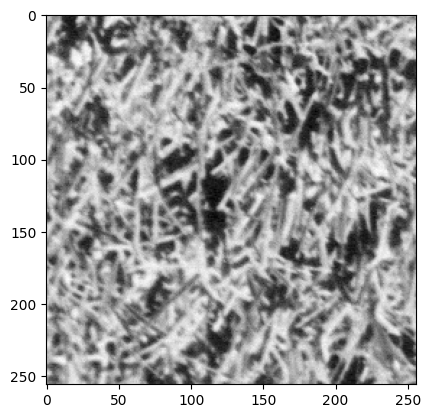

In [4]:
# Brodatz数据集的Dataset类
# 使用1.3.01.tiff至1.3.13.tiff这13个纹理图像作为13个不同的类别，每幅图像随机裁剪出100张256*256大小的子图像
# 在训练深度神经网络模型时，每类需要更多的图像，Brodatz数据集将不适用

import torch
from torch.utils.data import Dataset
import torchvision
from torchvision.io import read_image
import cv2 # 上面PyTorch的read_image函数无法读取tiff图像

import os
import random

class BrodatzDataset(Dataset):
    def __init__(self, img_dir, num_per_class=100, transform=None):
        self.img_dir = img_dir
        self.num_per_class = num_per_class
        self.transform = transform
        self.img_files = [img_dir + '1.3.' + str(i).zfill(2) + '.tiff' for i in range(1, 14)]
        self.labels = []
        for img_file in self.img_files:
            label = os.path.basename(img_file).split('.')[0][-2:]
            self.labels.append(int(label)-1)

    def __len__(self):
        return self.num_per_class * 13

    def __getitem__(self, index):
        label = index // self.num_per_class
        # image = read_image(self.img_files[index]).float()
        print(self.img_files[label])  # 打印图像文件路径
        if not os.path.exists(self.img_files[label]):
            print("Image file does not exist.")  # 如果图像文件不存在，打印错误信息

        image1024 = cv2.imread(self.img_files[label], -1)#.astype(np.float32)
        #image1024 = cv2.imreadmulti(self.img_files[label], cv2.IMREAD_UNCHANGED)
        h, w = image1024.shape
        # image1024 = np.expand_dims(image1024, axis=0)
        x = random.randint(0, w - 256)
        y = random.randint(0, h - 256)
        image = image1024[y:y+256, x:x+256]
        if self.transform:
            image = self.transform(image)
        return image, label

training_dataset = BrodatzDataset(img_dir='C:\\Users\\santa\\03_Texton\\textures_1024\\',
                  transform=torchvision.transforms.ToTensor())

a_sample = training_dataset[12] # [index, image/label, C, H, W]
print(a_sample)
print(a_sample[0].shape) # the image, [C, H, W]

import matplotlib.pyplot as plt
plt.imshow(a_sample[0][0], cmap='gray')
plt.show()

**Paddle代码：**

In [5]:
# If you are using Baidu AI Studio, you may need to upgrade the Python package matplotlib,
# otherwise the image cannot be displayed when you run this notebook.
# This may be fixed in the future release of AI Studio BML CodeLab.
%pip install --upgrade matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


(Tensor(shape=[1, 256, 256], dtype=float32, place=Place(cpu), stop_gradient=True,
       [[[0.45098042, 0.63921571, 0.61176473, ..., 0.63921571,
          0.62352943, 0.71372551],
         [0.47843140, 0.53725493, 0.63921571, ..., 0.66666669,
          0.69019610, 0.80000007],
         [0.50196081, 0.57254905, 0.56078434, ..., 0.70588237,
          0.71372551, 0.78431380],
         ...,
         [0.61960787, 0.66666669, 0.63921571, ..., 0.59607846,
          0.48235297, 0.49411768],
         [0.63529414, 0.60784316, 0.58039218, ..., 0.56862748,
          0.54901963, 0.45098042],
         [0.58039218, 0.48627454, 0.53333336, ..., 0.61568630,
          0.59607846, 0.54901963]]]), 0)
[1, 256, 256]
0


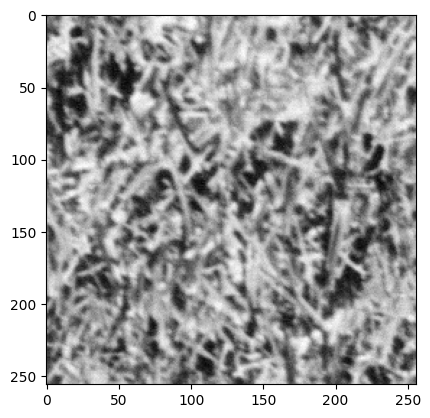

In [6]:
import numpy as np
import paddle
from paddle.io import Dataset
from paddle.vision import image_load
from PIL import Image
import cv2 # 上面的image_load函数无法读取tiff图像，可以使用PIL的Image类或者OpenCV的函数

import os
import random

class BrodatzDataset(Dataset):
    def __init__(self, img_dir, num_per_class=100, transform=None):
        self.img_dir = img_dir
        self.num_per_class = num_per_class # how many images we sample from one class
        self.transform = transform
        self.img_files = [img_dir + '1.3.' + str(i).zfill(2) + '.tiff' for i in range(1, 14)]
        self.labels = []
        for img_file in self.img_files:
            label = os.path.basename(img_file).split('.')[0][-2:]
            self.labels.append(int(label)-1)

    def __len__(self):
        return self.num_per_class * 13

    def __getitem__(self, index):
        label = index // self.num_per_class
        # image = read_image(self.img_files[index]).float()
        # image1024 = cv2.imread(self.img_files[label], -1)#.astype(np.float32)
        # image1024 = image_load(self.img_files[label])
        image1024 = np.asarray(Image.open(self.img_files[label]))
        h, w = image1024.shape
        # image1024 = np.expand_dims(image1024, axis=0)
        x = random.randint(0, w - 256)
        y = random.randint(0, h - 256)
        image = image1024[y:y+256, x:x+256]
        if self.transform:
            image = self.transform(image)
        return image, label

training_dataset = BrodatzDataset(img_dir='C:\\Users\\santa\\03_Texton\\textures_1024\\',
                    transform=paddle.vision.transforms.ToTensor())

a_sample = training_dataset[12] # [index, image/label, C, H, W]
print(a_sample)
print(a_sample[0].shape) # the image, [C, H, W]
print(a_sample[1]) # the label


from matplotlib import pyplot as plt

plt.imshow(a_sample[0][0], cmap='gray')

**Mindspore代码：**

In [4]:
#因为mindspore只支持3.9以下的python版本，而我搭载了openCV、pytorch、paddle等多种库环境的kernel是基于python3.11实现的，所以此段代码不运行
import numpy as np
import mindspore as ms
from mindspore import Dataset
from mindspore.dataset import GeneratorDataset
from PIL import Image
import cv2 # 上面的image_load函数无法读取tiff图像，可以使用PIL的Image类或者OpenCV的函数

import os
import random

class BrodatzDataset():
    def __init__(self, img_dir, num_per_class=100, transform=None):
        self.img_dir = img_dir
        self.num_per_class = num_per_class # how many images we sample from one class
        self.transform = transform
        self.img_files = [img_dir + '1.3.' + str(i).zfill(2) + '.tiff' for i in range(1, 14)]
        self.labels = []
        for img_file in self.img_files:
            label = os.path.basename(img_file).split('.')[0][-2:]
            self.labels.append(int(label)-1)

    def __len__(self):
        return self.num_per_class * 13

    def __getitem__(self, index):
        label = index // self.num_per_class
        # image = read_image(self.img_files[index]).float()
        # image1024 = cv2.imread(self.img_files[label], -1)#.astype(np.float32)
        # image1024 = image_load(self.img_files[label])
        image1024 = np.asarray(Image.open(self.img_files[label]))
        h, w = image1024.shape
        # image1024 = np.expand_dims(image1024, axis=0)
        x = random.randint(0, w - 256)
        y = random.randint(0, h - 256)
        image = image1024[y:y+256, x:x+256]
        if self.transform:
            image = self.transform(image)
        return image, label

training_dataset = BrodatzDataset(img_dir='C:\\Users\\santa\\03_Texton\\textures_1024\\')
training_dataset = GeneratorDataset(source=training_dataset, column_names=["image", "label"])

a_sample = training_dataset[12] # [index, image/label, C, H, W]
print(a_sample)
print(a_sample[0].shape) # the image, [C, H, W]
print(a_sample[1]) # the label


from matplotlib import pyplot as plt

plt.imshow(a_sample[0][0], cmap='gray')

ModuleNotFoundError: No module named 'mindspore'

**CURet数据集**

Based on the above code examples, please write your code using the CURet texture dataset. For simplicity, we will use the subset from VGG group, please download the [grey ones](http://www.robots.ox.ac.uk/~vgg/research/texclass/data/curetgrey.zip) or the [color ones](http://www.robots.ox.ac.uk/~vgg/research/texclass/data/curetcol.zip). 在本次作业中使用VGG组整理的CURet数据集的子集，下载灰度图像（推荐）或着彩色图像。There are 34 classes in this subset, and all images are cropped to 200x200 pixels.

D:\Anaconda\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

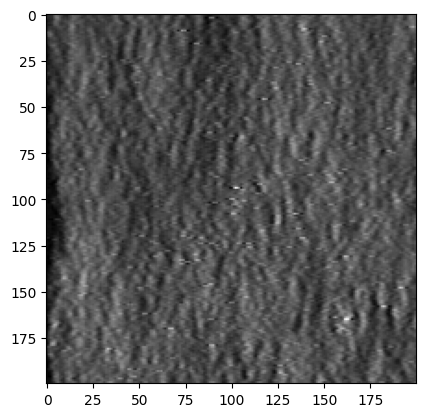

In [2]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset

class CURetDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_files = []
        self.labels = []
    
        
        # 遍历curetgrey文件夹下的所有子文件夹
        for dir in sorted(os.listdir(img_dir)):  # 假设子文件夹名称是排序的，如sample01, sample02, ...
            if os.path.isdir(os.path.join(img_dir, dir)) and dir.startswith('sample'):
                label = int(dir.replace('sample', ''))  # 提取标签，例如sample01变为1
                for img_name in sorted(os.listdir(os.path.join(img_dir, dir))):  # 遍历子文件夹中的所有图片
                    img_file = os.path.join(img_dir, dir, img_name)
                    self.img_files.append(img_file)
                    self.labels.append(label)

    def __getitem__(self, index):
        img_path = self.img_files[index]
        label = self.labels[index]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.img_files)

    def filter_by_class(self, num_classes=2):
        # 只保留前num_classes类的图像和标签
        filtered_img_files = []
        filtered_labels = []
        unique_labels = set(self.labels)

        # 假设每个类别的图像数量是均匀的
        images_per_class = len(self) // len(unique_labels)
        for label in unique_labels:
            if label < num_classes:
                indices = [i for i, l in enumerate(self.labels) if l == label]
                filtered_img_files.extend([self.img_files[i] for i in indices[:images_per_class]])
                filtered_labels.extend([label] * images_per_class)

        self.img_files = filtered_img_files
        self.labels = filtered_labels

# 使用修改后的CURetDataset
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

transform = transforms.Compose([
    transforms.Resize((200, 200)),  # 将图像大小调整为200x200像素
    transforms.ToTensor(),
])

training_dataset = CURetDataset(img_dir='C:\\Users\\santa\\03_Texton\\curetgrey', transform=transform)

# 获取数据集中的所有标签
all_labels = training_dataset.labels
print(all_labels)

# 获取数据集中的一个样本
a_sample = training_dataset[0]
print(a_sample)
print(a_sample[0].shape)  # 打印图像的形状
# 获取该样本的图像和标签
image, label = a_sample

# 打印标签
print(label)


# 显示图像
if a_sample is not None and a_sample[0] is not None:
    plt.imshow(a_sample[0].permute(1, 2, 0), cmap='gray')  # 需要转换为合适的维度顺序
    plt.show()


## Texton

### LM filter bank

著名的牛津大学的VVG组提供了多种filter bank的[Matlab代码](https://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html)。网上有人做了[Python的实现](https://github.com/tonyjo/LM_filter_bank_python)，但是其代码有bug，输出结果和Matlab的不一致，我把这个仓库fork了一份，并修正了其中的bug，给原作者提了PR。本次作业请使用我修改后的[Python代码](https://github.com/qilin512/LM_filter_bank_python/blob/master/lm.py)（我只修改了lm.py文件）。

输出的F矩阵（3维数组）包含了48个滤波器，每个都是49*49。


<center>
<img src="LM-filters.png" width="25%" height="25%">
<br>
LM-Filters from Liu2019IJCV.
</center>

In [5]:
# TODO 构造filter bank
# 可以把相关的代码拷贝过来，或者把该Python文件加入到工程中，作为jupyter笔记本调用的外部程序。
import numpy as np


def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))

    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*(x_/var)
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n, m = [(i - 1)/2 for i in shape]
    x, y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g

def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n, m = [(i - 1)/2 for i in shape]
    x, y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp(-(x*x + y*y) / (2*var))
    h = g*((x*x + y*y) - var)/(var**2)
    return h

def normalise(f):
    f = f - np.mean(f)
    f = f / np.sum(np.abs(f))
    return f

def makefilter(scale, phasex, phasey, pts, sup):

    gx = gaussian1d(3*scale, 0, pts[0, ...], phasex)
    gy = gaussian1d(scale,   0, pts[1, ...], phasey)

    f = gx*gy

    f = np.reshape(f, (sup, sup))
    f = normalise(f)
    return f

def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) ** np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    # y = [np.arange(-hsup,hsup+1)]
    y = [np.arange(hsup, -hsup - 1, -1)]

    [x, y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)

    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotmtx = np.array([[c, -s], [s, c]])
            rotpts = np.dot(rotmtx, orgpts)
            F[:, :, count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:, :, count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1

    count = nbar + nedge
    scales = np.sqrt(2) ** np.array([1, 2, 3, 4])

    for i in range(len(scales)):
        F[:, :, count]   = gaussian2d(sup, scales[i])
        F[:, :, count+1] = log2d(sup, scales[i])
        F[:, :, count+2] = log2d(sup, 3 * scales[i])
        count = count + 3

    return F


# Call the make filter function
if __name__ == '__main__':
    F = makeLMfilters()
    print(F.shape)

(49, 49, 48)


D:\Anaconda\envs\pytorch\Lib\site-packages\torchvision\transforms\functional.py:153: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:212.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


原始图像
(tensor([[[0.7569, 0.7255, 0.7412,  ..., 0.5647, 0.5020, 0.5412],
         [0.7255, 0.7333, 0.7647,  ..., 0.5725, 0.5412, 0.5725],
         [0.7137, 0.6627, 0.7490,  ..., 0.5333, 0.6118, 0.6314],
         ...,
         [0.8078, 0.7686, 0.7490,  ..., 0.6863, 0.6314, 0.6314],
         [0.8118, 0.7529, 0.7059,  ..., 0.6471, 0.6392, 0.5922],
         [0.8471, 0.7765, 0.7529,  ..., 0.6039, 0.6157, 0.4941]]]), 0)
torch.Size([1, 256, 256])


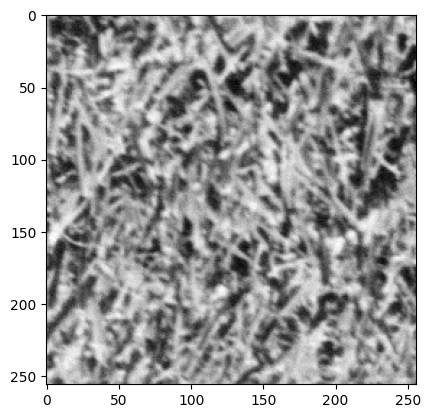

First order derivative Gaussian Filter


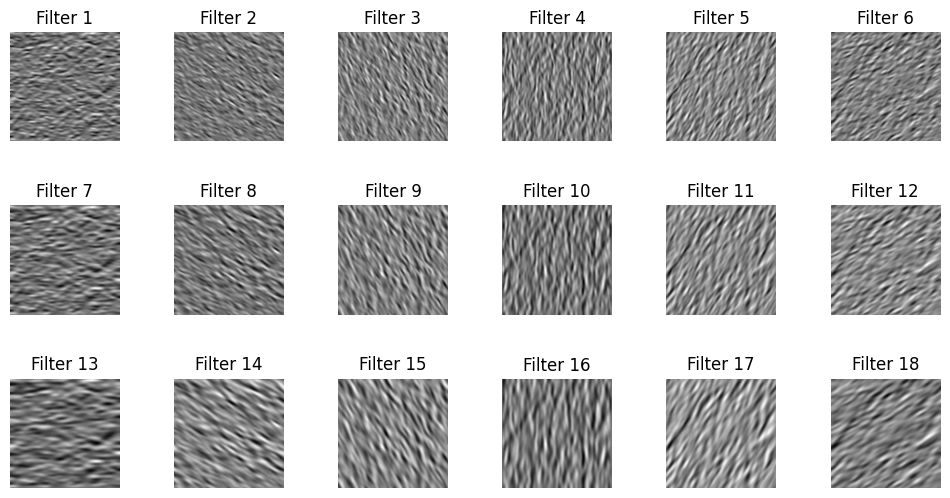

Second order derivative Gaussian Filter


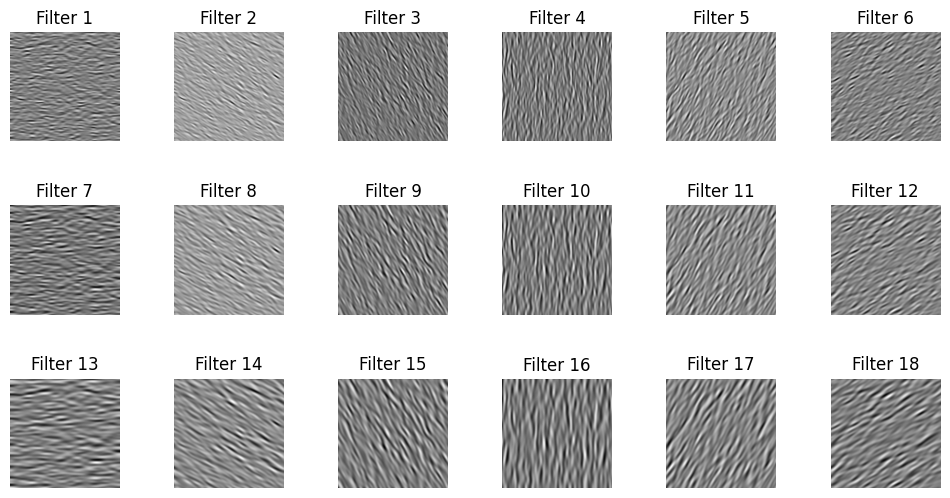

Gaussian and Laplacian Filter


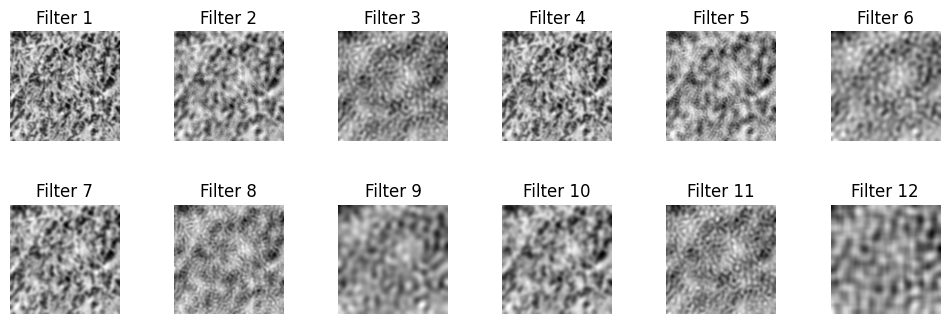

In [8]:
# TODO display the LM filter bank as the figure shows above 像上面的截图那样展示你生成的滤波器族
#这里的展示用上面截图的数据集BrodatzDataset展示
import cv2
import matplotlib.pyplot as plt
import scipy
import torch
from scipy.signal import convolve2d

# 假设 F 是已经定义好的滤波器数组，image 是加载的图像
# F 的形状应该是 [sup, sup, nf]，其中 nf 是滤波器数量
# image 的形状应该是 [height, width]

# 创建数据加载器
#dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=4)
training_dataset = BrodatzDataset(img_dir='C:\\Users\\santa\\03_Texton\\textures_1024\\',
                  transform=torchvision.transforms.ToTensor())

a_sample = training_dataset[12] # [index, image/label, C, H, W]
print("原始图像")
print(a_sample)
print(a_sample[0].shape) # the image, [C, H, W]

plt.imshow(a_sample[0][0], cmap='gray')
plt.show()
image = a_sample[0][0]


# 转换图像为灰度图像，如果图像是多通道的
if len(image.shape) > 2:
    gray_image = np.mean(image, axis=2)
else:
    gray_image = image


#First order derivative Gaussian Filter
# 应用滤波器并显示结果
fig, axes = plt.subplots(3, 6, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    if i < 18:
        # 使用 convolve2d 函数进行卷积操作
        filtered_image = convolve2d(image, F[:, :, i], mode='same', boundary='symm')
        
        # 显示滤波后的图像
        ax.imshow(filtered_image, cmap='gray')
        ax.set_title(f'Filter {i+1}')
        ax.axis('off')
print("First order derivative Gaussian Filter")
plt.show()

#Second order derivative Gaussian Filter
# 应用滤波器并显示结果
fig, axes = plt.subplots(3, 6, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    if i < 18:
        # 使用 convolve2d 函数进行卷积操作
        filtered_image = convolve2d(image, F[:, :, i+18], mode='same', boundary='symm')
        
        # 显示滤波后的图像
        ax.imshow(filtered_image, cmap='gray')
        ax.set_title(f'Filter {i+1}')
        ax.axis('off')
print("Second order derivative Gaussian Filter")
plt.show()
    
#Gaussian and Laplacian Filter
# 应用滤波器并显示结果
fig, axes = plt.subplots(3, 6, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axes.flat):
    if i < 12:
        # 使用 convolve2d 函数进行卷积操作
        filtered_image = convolve2d(image, F[:, :, i+36], mode='same', boundary='symm')
        
        # 显示滤波后的图像
        ax.imshow(filtered_image, cmap='gray')
        ax.set_title(f'Filter {i+1}')
        ax.axis('off')
# 移除未使用的轴
for j in range(12, 18):
    fig.delaxes(axes[j//6, j%6])

print("Gaussian and Laplacian Filter")
plt.show()

### 基于滤波器响应(texton)的纹理图像分类

使用filter bank对图像进行滤波，滤波后的response在深度学习领域称为feature map特征图，假设滤波器个数为C，每个图像将产生C个feature map。特征图的元素个数还是很多，为了得到更低维的表示，计算每个特征图的零阶矩，比如均值和方差，并串联起来组成特征图的特征向量。因此可以得到元素个数为2C的特征向量，用这个特征向量作为这幅纹理的表征representation。

然后就可以使用机器学习算法对图像进行分类任务。这里先使用K-最近邻算法（K-Nearest Neighbourhood，KNN）。关于KNN算法，可以参考这个[知乎文章](https://zhuanlan.zhihu.com/p/25994179)或者这个[英文教程](https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_knn_algorithm_finding_nearest_neighbors.htm)进行学习。

Python的scikit库的文档里有使用Garbor filters进行纹理分类的[例子](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html)，有一点相似的地方，可以参考。

为了衡量分类算法的性能，需要把划分训练集和测试集（有时还需要验证集，比如为了选定KNN里距离函数）。请你先返回上面“数据集”一节的代码，修改为两个类，一个是train另一个是test，里面数据个数比例为8:2。在train数据集上训练KNN模型，在test数据集上测试，看看分类的正确率有多少，即test数据集里分类正确的数据个数占test数据集总个数的百分比。

In [9]:
# TODO 使用feature map的简单统计特征（均值和方差）对图像进行分类
#这里选择两类进行展示
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import torchvision
from scipy.signal import convolve2d

C = 48  # filter bank的数量

#training_dataset = BrodatzDataset(img_dir='C:\\Users\\santa\\03_Texton\\textures_1024\\',
                  #transform=torchvision.transforms.ToTensor())
training_dataset = CURetDataset(img_dir='C:\\Users\\santa\\03_Texton\\curetgrey', transform=torchvision.transforms.ToTensor())
training_dataset.filter_by_class(num_classes=3)
print(training_dataset[0])
total_images = len(training_dataset)#2*92
print(total_images)

# #对每张图像应用filter bank进行滤波
feature_maps = np.empty((total_images, C,49, 49))
for i in range(total_images):
    image, _ = training_dataset[i]  # 获取图像，忽略标签
    for j in range(C):
        image = np.resize(image, (49, 49))
        feature_maps[i, j] = convolve2d(image, F[:, :, j], mode='same', boundary='symm')
    

# 计算每个特征图的均值和方差
mean_feature_maps = np.mean(feature_maps, axis=(2, 3))
variance_feature_maps = np.var(feature_maps, axis=(2, 3))

# 将均值和方差串联起来，形成特征向量
features = np.concatenate((mean_feature_maps, variance_feature_maps), axis=1)

# 创建标签，两种纹理
labels = training_dataset.labels

# 如果特征和标签数量不匹配，可以使用以下方式调整长度
if len(labels) < len(features):
    features = features[:len(labels)]
elif len(labels) > len(features):
    labels = labels[:len(features)]


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 使用KNN算法进行分类
knn = KNeighborsClassifier(n_neighbors=3)  # 选择k=3
knn.fit(X_train, y_train)

# 在测试集上进行预测
predictions = knn.predict(X_test)

# 计算分类正确率
accuracy = accuracy_score(y_test, predictions)
print(f"分类正确率为: {accuracy * 100:.2f}%")

(tensor([[[0.0784, 0.1020, 0.1059,  ..., 0.1961, 0.1961, 0.1882],
         [0.0784, 0.0863, 0.0824,  ..., 0.2000, 0.1922, 0.1882],
         [0.0824, 0.0745, 0.0824,  ..., 0.2196, 0.1961, 0.1765],
         ...,
         [0.0235, 0.0196, 0.0275,  ..., 0.1333, 0.1294, 0.1373],
         [0.0353, 0.0235, 0.0353,  ..., 0.1490, 0.1333, 0.1294],
         [0.0275, 0.0275, 0.0353,  ..., 0.1216, 0.1373, 0.1686]]]), 1)
184
分类正确率为: 62.16%


### 生成textons

通过上面的实验可以发现，分类效果并不好，很大一部分原因是因为仅使用feature map的均值和方差并不能很好的表征纹理图像，一幅图像或者其feature map包含很多信息，而仅使用feature map的两个一阶统计量是不够的。

这里我们要借鉴这篇[论文](https://people.eecs.berkeley.edu/~malik/papers/LM-3dtexton.pdf)中的方法了。使用LM filter bank对纹理图像进行滤波，在feature map的基础上生成Texton，然后使用texton组成的codebook完成分类任务。具体地，针对一幅纹理图像（大小为$H\times W$），使用filter bank进行滤波（假设滤波器个数为C），得到$H \times W \times C$的特征图。每个像素对应一个C维的特征向量。针对这$H \times W$个特征向量进行K-means聚类，设置聚类类别数比如K=20。这K个聚类中心即称为该纹理图像的appearance vector。这种算法是稀疏编码在纹理图像上的应用，对应着bag-of-words模型里的字典。

K-means算法可以通过[这篇知乎文章](https://zhuanlan.zhihu.com/p/20432322)或者[这篇英文教程](https://realpython.com/k-means-clustering-python/)进行学习。

下面请用代码实现生成texton的算法。

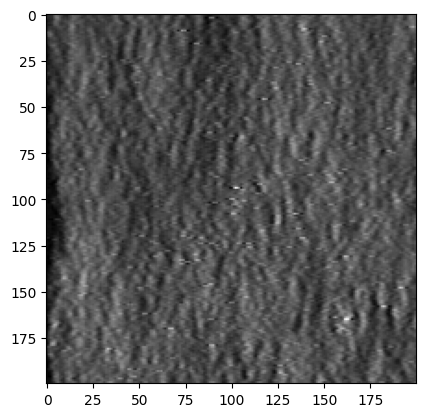

Textons:
[[-5.60571161e-04 -1.27015319e-03 -1.52286647e-03 -5.81064647e-05
   6.55771409e-04  1.02565771e-04 -4.44405008e-04 -1.06356842e-03
  -1.28901108e-03  2.71677169e-04  5.21539836e-04  1.19511954e-04
  -7.51112044e-05 -5.35865977e-04 -4.71234738e-04  6.02639234e-04
   3.91562019e-04  5.67817596e-05  1.42869217e-03  5.12281774e-03
   5.80300376e-03  1.17661546e-03  2.22443154e-03  2.46404132e-03
   4.74840611e-04  3.21487147e-03  3.48183080e-03  6.90497743e-04
   9.64650805e-04  1.27168000e-03  1.84889004e-04  1.61300767e-03
   1.13796587e-03  1.78532333e-04  5.62828346e-05  2.49077536e-04
   4.52154019e-01  2.53521357e-01  8.08923930e-02  6.63083820e-01
   1.79453644e-01  5.66204872e-02  9.56641247e-01  1.23788454e-01
   3.68068271e-02  1.36262060e+00  8.59806299e-02  1.49507226e-02]
 [-2.64546809e-04 -4.15031218e-04 -5.23178036e-04  1.02607522e-04
  -1.65223202e-04 -3.67536302e-04 -3.22925447e-04 -3.92506822e-04
  -2.41051650e-04  1.54417255e-04 -1.19029886e-04 -3.55782014e-05


In [12]:
# TODO 使用K-means实现一幅纹理图像的滤波响应向量聚类
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.image import extract_patches_2d

# 假设我们有一幅纹理图像，大小为 H x W
H, W = 49, 49  # 图像的高度和宽度,为了下面匹配对256*256进行了修改
C = 48  # filter bank中滤波器的数量

texture_image,_ = training_dataset[0]
plt.imshow(texture_image.permute(1, 2, 0), cmap='gray')  # 需要转换为合适的维度顺序
plt.show()

# 对图像应用滤波器
feature_maps = np.empty((H, W, C))
texture_image = np.resize(texture_image, (49, 49))
for i in range(C):
    feature_maps[:, :, i] = convolve2d(texture_image, F[:,:,i], mode='same',boundary='symm')

# 将特征图展平为一个像素特征向量列表
pixel_features = feature_maps.reshape(-1, C)

# 使用K-means算法进行聚类，生成textons
K = 20  # 聚类中心数量
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixel_features)

# 获取聚类中心，即textons
textons = kmeans.cluster_centers_

# 打印textons
print("Textons:")
print(textons)
print(textons.shape)


### 基于texton的纹理分类

如果做纹理分类任务，将数据集中的所有纹理图像都进行上述处理，每个图像都产生K个聚类中心（texton），该向量称为appearance vector。所有图像的texton放在一起，再按距离把相似的进行合并（这一步可选），最终得到Q个texton。这样，每个图像的每个像素属于哪个texton是可追溯的，能得到一幅或者一类图像在这Q个texton上的频率分布（直方图）。在推断的时候，给定一幅纹理图像，还是用这个filter bank滤波后，每个像素对应的特征向量和Q个texton计算距离，选择距离最近的作为其对应的texton，从而获得该图像在Q个texton上的分布直方图。将该直方图和训练集中的每类对应的直方图计算卡方距离（$\chi^2$ distance），即能进行分类。

下面，请实现该算法：

In [3]:
# TODO 基于texton的纹理分类
#链接下载的数据集共62个类，未找到实验所说的VGG组整理的子类，所以这里使用前34个类
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import torchvision
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
#from scipy.spatial.distance import chi2

training_dataset = CURetDataset(img_dir='C:\\Users\\santa\\03_Texton\\curetgrey', transform=transform)
training_dataset.filter_by_class(num_classes=35)

# 数据集中所有纹理图像，每幅图像有C个feature map
C = 48  # feature map的数量
total_images = len(training_dataset) #34*92
print(total_images)

def textons_creat(texture_image):
    # 对图像应用滤波器
    feature_maps = np.empty((49, 49, 48))
    texture_image = np.resize(texture_image, (49, 49))
    for i in range(C):
        feature_maps[:, :, i] = convolve2d(texture_image, F[:,:,i], mode='same',boundary='symm')

    # 将特征图展平为一个像素特征向量列表
    pixel_features = feature_maps.reshape(-1, C)

    # 使用K-means算法进行聚类，生成textons
    K = 20  # 聚类中心数量
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(pixel_features)

    # 获取聚类中心，即textons
    textons = kmeans.cluster_centers_
    return textons

#相似texton合并
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def find_similar_textons(textons, threshold):
    clusters = []
    for i, texton in enumerate(textons):
        found_cluster = False
        for cluster in clusters:
            if euclidean_distance(texton, textons[cluster[0]]) < threshold:
                cluster.append(i)
                found_cluster = True
                break
        if not found_cluster:
            clusters.append([i])
    return clusters

def merge_similar_textons(textons, threshold):
    # 根据相似度阈值合并相似textons
    clusters = find_similar_textons(textons, threshold)
    
    merged_textons = []
    for cluster in clusters:
        # 将cluster中的非整数索引值转换为整数索引
        cluster_indices = [int(idx) for idx in cluster]
        # 计算在cluster中的textons的均值作为代表性texton
        representative_texton = np.mean([textons[idx] for idx in cluster_indices], axis=0)
        merged_textons.append(representative_texton)
    
    return np.array(merged_textons)

生成纹理图像的feature maps和appearance vectors
K = 20  # 聚类中心数量
all_appearance_vectors = []
for i in range(total_images):
    image,_ = training_dataset[i]
    all_appearance_vectors.append(textons_creat(image))
    
# 合并所有图像的texton
#merged_textons = np.vstack(all_appearance_vectors)
threshold = 0.1 
merged_textons = merge_similar_textons(all_appearance_vectors, threshold)
Q = len(merged_textons)  # 最终文本数量
#print(Q)

计算每幅图像在texton上的频率分布（直方图）
histograms = []
for appearance_vectors in all_appearance_vectors:
    histogram, _ = np.histogram(appearance_vectors, bins=Q, range=(0, Q-1))
    histograms.append(histogram)

# 创建标签
labels =training_dataset.labels
#print(len(histograms))
#print(len(labels))

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2, random_state=42)

# 使用KNN算法进行分类
knn = KNeighborsClassifier(n_neighbors=3)  # 选择k=3
knn.fit(X_train, y_train)

# 在测试集上进行预测
predictions = knn.predict(X_test)

# 计算分类正确率
accuracy = accuracy_score(y_test, predictions)
print(f"分类正确率为: {accuracy * 100:.2f}%")

3128
分类正确率为: 80.20%


### 基于texton的纹理重建

输入：一幅纹理图像

目标：对这幅图像构建的texton字典，利用texton重构该图像。

原理：图像的每个像素都对应一个texton，可以通过其对应的appearance vector求滤波器的最小二乘下的输入是什么样子的。

具体的做法在上面的论文中有详细描述：

1. 计算滤波器矩阵的伪逆。将每个滤波器都拉成一个行向量，C个滤波器构成一个新的F矩阵（$HW \times C$），求这个矩阵的伪逆$F^+$。
2. $F^+$与每个texton的appearance vector相乘，得到每个texton对应的重构patch。根据原图像的每个像素值对应的texton，找到对应的重构patch（记得把得到的向量reshape成滤波器大小的patch），将该patch的中心元素作为重构图像的该像素的像素值。

要求达到类似原文Figure 5所展示的效果，注意，选用的纹理图像不一样，效果会有区别。

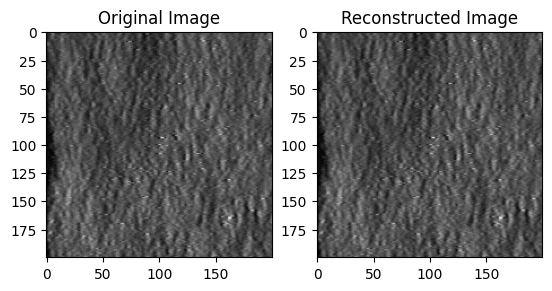

In [22]:
# TODO 使用texton对纹理进行重构
import numpy as np
from sklearn.cluster import KMeans
from scipy.linalg import pinv
from scipy.signal import convolve2d


H ,W= 49,49
C = 48  # filter bank中滤波器的数量
training_dataset = CURetDataset(img_dir='C:\\Users\\santa\\03_Texton\\curetgrey', transform=transform)

# 获取数据集中的一个样本
image,_ = training_dataset[0]

# 对图像应用滤波器
feature_maps = np.empty((49, 49, 48))
texture_image = np.resize(image, (49, 49))
for i in range(C):
    feature_maps[:, :, i] = convolve2d(texture_image, F[:,:,i], mode='same',boundary='symm')
# 将特征图展平为一个像素特征向量列表
pixel_features = feature_maps.reshape(-1, C)

# 使用K-means算法进行聚类，生成textons
K = 20  # 聚类中心数量
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(pixel_features)

# 获取聚类中心，即textons
textons = kmeans.cluster_centers_
# 将每个滤波器拉成一个行向量，构成F矩阵
F1 = F.reshape(C, -1).T

# 计算F矩阵的伪逆
F_pinv = pinv(F1)

# 对每个texton进行重构
#F_pinv 的形状是 (48, 2401)，而textons.T 的形状是 (48, 20)。这意味着在进行矩阵乘法时，第一个矩阵的列数必须与第二个矩阵的行数相匹配，但它们的维度并不匹配
#所以得将伪逆也转置一下
reconstructed_patches = np.dot(F_pinv.T, textons_T).reshape(-1, H, W)

# 根据原图像的每个像素值对应的texton，找到对应的重构patch
# 并将patch的中心元素作为重构图像的该像素的像素值
reconstructed_image = np.empty((H, W))
for i in range(H):
    for j in range(W):
        # 找到对应的texton
        texton_index = kmeans.predict(pixel_features[i*W+j].reshape(1, -1))[0]
        # 获取对应的重构patch
        patch = reconstructed_patches[texton_index]
        # 将patch的中心元素作为重构图像的像素值
        reconstructed_image[i, j] = patch[i, j]

# 显示原始图像和重构图像
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

## 可学习的特征

filter bank设计得很巧妙，是学者的脑力贡献，如何运用filter bank提取的丰富特征？我们前面用了均值和方差统计特征（average pooling）和texton（聚类pooling）。如果能从数据中学习到更合适的滤波器，岂不是更好？

我们使用深度神经网络里的CNN（convolutional neural network）模型。2016年PR Letter上有篇文章[Using filter banks in Convolutional Neural Networks for texture classification](https://www.semanticscholar.org/paper/Using-filter-banks-in-Convolutional-Neural-Networks-Andrearczyk-Whelan/988b4683dfb0566cf862f37d9e452d94d0bed916)，设计了2层CNN，后接几个FC层，进行了纹理分类任务，这篇工作的网络模型非常简单，但是对数据集的收集和实验做的比较好，值得阅读和借鉴。

请设计一个两层的CNN网络，第一个卷积层设置为之前使用的LM filter bank：48个卷积核（滤波器），大小为$49 \times 49$（够大核的）。第二层卷积层的卷积核大小为$1 \times 1$，卷积核的个数设置为纹理类别的个数。网络的第三层为global average pooling层(GAP层)。最后接softmax输出类别概率。

第一层卷积层因为使用设计好的filter bank，所以需要加载现成的参数，相当于预训练的部分模型参数。

代码实现分两部分。第一部分先freeze第一个卷积层，只学习第二个卷积层。第二部分学习网络的全部参数，相当于对filter bank进行微调fine tuning。对比一下两个部分的分类效果，并把第二部分的微调后的第一个卷积层的滤波器保存并可视化出来，看看和学者们设计的滤波器相比有什么变化。

In [23]:
# 华为智能基座吗？
# import mindspore as torch

# 下面这个示例是关于如何修改网络参数以及固定网络参数不更新

import numpy as np
import torch
from torch import nn

class TextonNet(nn.Module):
    def __init__(self):
        super(TextonNet, self).__init__()
        self.conv_test = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding='same', bias=False)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=48, kernel_size=49, padding='valid', bias=False)
        self.conv2 = nn.Conv2d(in_channels=48, out_channels=13, kernel_size=1)
        self.pooling = nn.AdaptiveAvgPool2d(output_size=1)
    def forward(self, x):
        x = self.conv_test(x)
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.pooling(out)
        out = out.flatten(start_dim=1)
        return out

model = TextonNet()
print(f"Model structure: {model}\n\n")

x = torch.randn(2, 1, 256, 256)
y = model(x)
print(y.shape, '\n', y)

Model structure: TextonNet(
  (conv_test): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=same, bias=False)
  (conv1): Conv2d(1, 48, kernel_size=(49, 49), stride=(1, 1), padding=valid, bias=False)
  (conv2): Conv2d(48, 13, kernel_size=(1, 1), stride=(1, 1))
  (pooling): AdaptiveAvgPool2d(output_size=1)
)


torch.Size([2, 13]) 
 tensor([[ 0.1399,  0.0097,  0.0840,  0.1053, -0.0302,  0.0368,  0.0409, -0.0471,
          0.0947, -0.1401,  0.0512, -0.0141,  0.0855],
        [ 0.1406,  0.0114,  0.0840,  0.1056, -0.0316,  0.0368,  0.0430, -0.0469,
          0.0944, -0.1401,  0.0494, -0.0157,  0.0855]],
       grad_fn=<ViewBackward0>)


In [24]:
state_dict = model.state_dict()
print(f"Layer: conv_test | Size: {state_dict['conv_test.weight'].size()} | Values : {state_dict['conv_test.weight']} \n")

# 修改模型的某个参数，参考这个实现加载LM filter bank
with torch.no_grad():
    # 修改卷积层里的conv_test滤波器为Sobel算子
    model.conv_test.weight[0][0] = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print(f"Layer: conv_test | Size: {state_dict['conv_test.weight'].size()} | Values : {state_dict['conv_test.weight']} \n")

Layer: conv_test | Size: torch.Size([1, 1, 3, 3]) | Values : tensor([[[[ 0.1723, -0.3099,  0.1741],
          [-0.2635, -0.1780, -0.2160],
          [-0.1049,  0.1751,  0.0214]]]]) 

Layer: conv_test | Size: torch.Size([1, 1, 3, 3]) | Values : tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]]) 



### 冻结模型参数

In [26]:
# 获取模型的参数，有state_dict和parameters（named_parameters)两种方法，
# 除了返回类型不同外，更重要的是参数的requires_grad属性的区别。
# 尤其是需要把某些参数freeze，使其不在学习过程中更新


# 方法1：直接修改参数的"requires_grad"值
model.fc1.weight.requires_grad = False

# 方法2：通过parameters()或named_parameter()函数返回的生成器(generator)来修改
for name, param in model.named_parameters():
    if name == 'conv1.weight':
        param.requires_grad = False

for name, param in model.named_parameters():
    print(f'{name}, {param.requires_grad}')
print('\n')

# 如何验证修改成功了呢？
# 这时需要使用parameters()或者named_parameters()函数提取参数，然后输出其requires_grad属性查看。
# 因为模型训练时，是把模型的parameters()传给优化器，而不是state_dict。

# 错误的方法：通过state_dict来修改
# 这种做法无法在反向传播时冻结参数
# state_dict提取的模型参数的requires_grad默认都是False
# 比如直接输出fc1.bias的requires_grad属性，结果为False
print("state_dict['fc1.bias'].requires_grad is ")
print(model.state_dict()['fc1.bias'].requires_grad)

# 下面的代码，使用state_dict将fc1.bias的requires_grad修改为False，
# 通过state_dict的方式再次验证，其值也是False，
# 但是通过named_parameters()方法查看其requires_grad属性，结果还是True
model.state_dict()['fc1.bias'] = False
print("state_dict['fc1.bias'].requires_grad is ")
print(model.state_dict()['fc1.bias'].requires_grad)
for name, param in model.named_parameters():
    print(f'{name}, {param.requires_grad}')
print('\n')
# PyTorch这样设计是因为考虑到使用state_dict提取模型参数时通常会做一些修改，
# 如果这些修改使用了某些影响梯度跟踪的运算，当requires_grad默认是True时会影响该参数的梯度计算。

# 网上有人提到用下面这种方法也是错误的。
tmp_state_dict = model.state_dict()
tmp_state_dict['fc1.bias'].requires_grad = False
model.load_state_dict(tmp_state_dict)
for name, param in model.named_parameters():
    print(f'{name}, {param.requires_grad}')
print('\n')

思考题：如果微调后的滤波器分类效果更好的话，可否用在重构任务上？重构的效果会不会更好？如果重构效果更好的话，可否用深度网络实现重构任务？